# `naturf` Quickstarter

The Neighborhood Adaptive Tissues for Urban Resilience Futures tool (NATURF) is a Python workflow that generates files readable by the Weather Research and Forecasting (WRF) model. NATURF uses *geopandas* and *hamilton* to calculate 132 building parameters from shapefiles with building footprint and height information. These parameters can be collected and used in many formats, and the primary output is a binary file configured for input to WRF. This workflow is a flexible adaptation of the National/World Urban Database and Access Portal Tool (NUDAPT/WUDAPT) that can be used with any study area at any spatial resolution. The climate modeling community and urban planners can identify the effects of building/neighborhood morphology on the microclimate using the urban parameters and WRF-readable files produced by NATURF. The source code for NATURF can be found on [GitHub](https://github.com/IMMM-SFA/naturf/tree/main), and more information on the urban parameters calculated can be found in the [documentation](https://immm-sfa.github.io/naturf/).

In [1]:
from naturf import driver

C:\Users\levis\anaconda3\envs\test3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


## Case 1

`naturf` requires two inputs: an input dictionary with the location of the shapefile, and a list of the desired outputs. For this first case, we can look at three outputs: plan area fraction, plan area weighted mean building height, and sky view factor.

In [2]:
inputs = {
    "input_shapefile": "../naturf/data/C-5.shp",
}
outputs = ["plan_area_fraction","area_weighted_mean_of_building_heights","sky_view_factor"]
model = driver.Model(inputs, outputs)

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


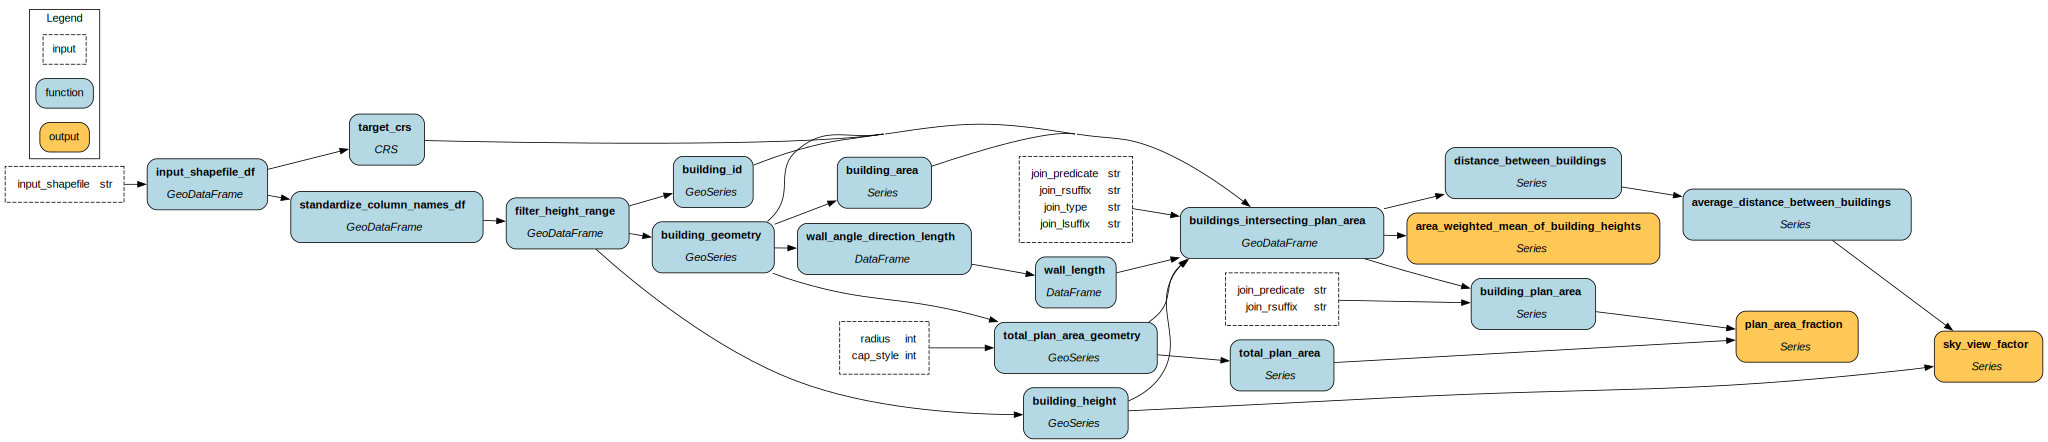

In [3]:
# Note: you will need graphviz to visualize the Directed Acyclic Graph (DAG)
# https://graphviz.org/download/
model.graph()

In [4]:
df = model.execute()

Naturf DAG -> Execution Complete!                   : 100%|█████████████████████████| 19/19 [00:19<00:00,  1.04s/funcs]


In [5]:
df.head(3)

,plan_area_fraction,area_weighted_mean_of_building_heights,sky_view_factor
0,0.009073,2.660000,0.168611
1,0.010528,2.660000,0.168611
2,0.128917,20.193242,0.730937


## Case 2

Now we can run the full model in order to get the required inputs to WRF. WRF requires two files: a binary file with the urban parameter data gridded and written row by row into binary and an index file that tells WRF where to put and how to display the data. See the [WRF User Guide](https://homepages.see.leeds.ac.uk/~lecrrb/wrf/aRWUsersGuide.pdf) for more information. The nodes "write_binary" and "write_index" will write the required files to the working directory, and we will also output "merge_parameters" to see all of the calculated parameters.

In [8]:
outputs = ["merge_parameters", "write_binary", "write_index"]
model = driver.Model(inputs, outputs)

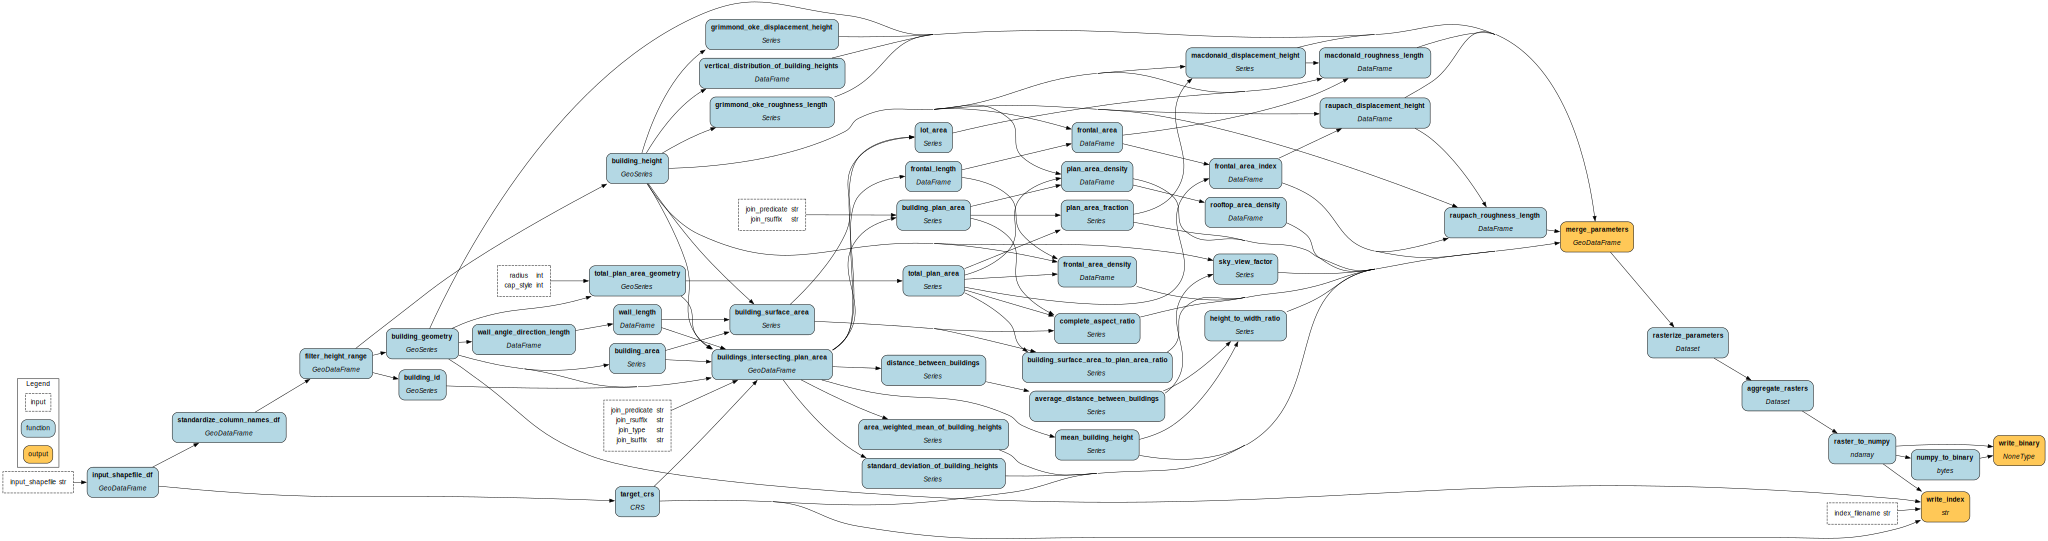

In [9]:
model.graph()

In [11]:
df = model.execute()

Naturf DAG -> rasterize_parameters                     :  87%|███████████████████▏  | 40/46 [00:21<00:02,  2.71funcs/s]
********************************************************************************
> rasterize_parameters [naturf.output.rasterize_parameters()] encountered an error<
> Node inputs:
{'merge_parameters':      frontal_area_north_0  frontal_area_north_1  frontal_area_north_2  \
0                0.001903              0.000000              0.000000   
1                0.002208              0.000000              0.000000   
2                0.019133              0.019133              0.019133   
3                0.023445              0.023445              0.009331   
4                0.036085              0.036085              0.018620   
..                    ...                   ...                   ...   
187              0.072072              0.000000              0.000000   
188              0.002350              0.000000              0.000000   
189              0.042

KeyError: "None of [Index(['frontal_area_north_0geometry', 'frontal_area_north_1geometry',\n       'frontal_area_north_2geometry', 'frontal_area_north_3geometry',\n       'frontal_area_north_4geometry', 'frontal_area_north_5geometry',\n       'frontal_area_north_6geometry', 'frontal_area_north_7geometry',\n       'frontal_area_north_8geometry', 'frontal_area_north_9geometry',\n       ...\n       'vertical_distribution_of_building_heights_6geometry',\n       'vertical_distribution_of_building_heights_7geometry',\n       'vertical_distribution_of_building_heights_8geometry',\n       'vertical_distribution_of_building_heights_9geometry',\n       'vertical_distribution_of_building_heights_10geometry',\n       'vertical_distribution_of_building_heights_11geometry',\n       'vertical_distribution_of_building_heights_12geometry',\n       'vertical_distribution_of_building_heights_13geometry',\n       'vertical_distribution_of_building_heights_14geometry',\n       'building_countgeometry'],\n      dtype='object', length=133)] are in the [columns]"

In [ ]:
df.columns()

In [ ]:
df.head()

## Optional: DAGWorks Interactive Dashboard

Since we're using `hamilton` to run `naturf`, users can log each run to DAGWorks (researchers/academics have access to the free tier) by signing up at www.dagworks.io and creating a project. Then either set the environment variables DAGWORKS_API_KEY, DAGWORKS_USERNAME, and DAGWORKS_PROJECT_ID below or set it on the module directly.

Note: The cell below is in the "raw" format, if you want to run it, change the cell type to "python".